In [2]:
import xarray as xr
import matplotlib.pyplot as plt
from glob import glob
import numpy as np
from karin import plot_karin_old

In [11]:
# version = 'v0_2_0'
#version = 'v0_3_0'
#version = 'v1_0_0'
version = 'v2_0'

#region = 'browsebasin'
#area = [120, -16, 125, -11] # Kimberley
# ncfiles = sorted(glob('/home/jupyter-mrayson/data/SWOT/l3_karin_nadir_v0_3/*_021*.nc'))
#ncfiles = sorted(glob('/home/jupyter-mrayson/data/SWOT/l3_karin_nadir_v1_0/cycle_[4-5]*/*_021*.nc'))

region = 'pilbara'
area = [112, -21.5, 118, -15] # Pilbara
satpass = '409' #'381' #'312' # '103' '312' '034'
ncfiles = sorted(glob(f'/home/jupyter-mrayson/data/SWOT/l3_karin_nadir_v2_0/cycle_0*/*_{satpass}_*.nc'))

# region = 'brunei'
# area = [109, 3, 113, 9] 
# ncfiles = sorted(glob('/home/jupyter-mrayson/data/SWOT/l3_karin_nadir/*_008*.nc'))

# region = 'southchinasea'
# area = [108, 9, 113, 18] 
# ncfiles = sorted(glob('/home/jupyter-mrayson/data/SWOT/l3_karin_nadir/*_008*.nc'))

# region = 'indoseas_pass021'
# area = [108, -11, 135, 9] 
# ncfiles = sorted(glob('/home/jupyter-mrayson/data/SWOT/l3_karin_nadir_v0_3/*_021*.nc'))

# region = 'ningaloo_pass062'
# area = [113, -23, 115, -20.5] # Ningaloo
# ncfiles = sorted(glob('/home/jupyter-mrayson/data/SWOT/l3_karin_nadir_v1_0/cycle_0*/*_062*.nc'))

# region = 'ningaloo_pass131'
# area = [113, -23, 115, -20.5] # Ningaloo
# ncfiles = sorted(glob('/home/jupyter-mrayson/data/SWOT/l3_karin_nadir_v1_0/cycle_0*/*_131*.nc'))
ncfiles

['/home/jupyter-mrayson/data/SWOT/l3_karin_nadir_v2_0/cycle_001/SWOT_L3_LR_SSH_Expert_001_409_20230804T192411_20230804T201538_v2.0.0.nc',
 '/home/jupyter-mrayson/data/SWOT/l3_karin_nadir_v2_0/cycle_002/SWOT_L3_LR_SSH_Expert_002_409_20230825T160916_20230825T170042_v2.0.0.nc',
 '/home/jupyter-mrayson/data/SWOT/l3_karin_nadir_v2_0/cycle_003/SWOT_L3_LR_SSH_Expert_003_409_20230915T125422_20230915T134549_v2.0.0.nc',
 '/home/jupyter-mrayson/data/SWOT/l3_karin_nadir_v2_0/cycle_004/SWOT_L3_LR_SSH_Expert_004_409_20231006T093924_20231006T103050_v2.0.0.nc',
 '/home/jupyter-mrayson/data/SWOT/l3_karin_nadir_v2_0/cycle_005/SWOT_L3_LR_SSH_Expert_005_409_20231027T062429_20231027T071555_v2.0.0.nc',
 '/home/jupyter-mrayson/data/SWOT/l3_karin_nadir_v2_0/cycle_006/SWOT_L3_LR_SSH_Expert_006_409_20231117T030934_20231117T040100_v2.0.0.nc',
 '/home/jupyter-mrayson/data/SWOT/l3_karin_nadir_v2_0/cycle_007/SWOT_L3_LR_SSH_Expert_007_409_20231207T235440_20231208T004606_v2.0.0.nc',
 '/home/jupyter-mrayson/data/SWOT/

In [12]:
ds = xr.open_dataset(ncfiles[0])
ds

<xarray.Dataset>
Dimensions:               (num_lines: 9860, num_pixels: 69, num_nadir: 1373)
Coordinates:
    latitude              (num_lines, num_pixels) float64 ...
    longitude             (num_lines, num_pixels) float64 ...
Dimensions without coordinates: num_lines, num_pixels, num_nadir
Data variables: (12/21)
    time                  (num_lines) datetime64[ns] ...
    calibration           (num_lines, num_pixels) float64 ...
    cross_track_distance  (num_pixels) float64 ...
    dac                   (num_lines, num_pixels) float32 ...
    internal_tide         (num_lines, num_pixels) float64 ...
    mdt                   (num_lines, num_pixels) float64 ...
    ...                    ...
    ugosa_unfiltered      (num_lines, num_pixels) float64 ...
    vgos                  (num_lines, num_pixels) float64 ...
    vgosa_filtered        (num_lines, num_pixels) float64 ...
    vgosa_unfiltered      (num_lines, num_pixels) float64 ...
    i_num_line            (num_nadir) int16 ...
    i_num_pixel           (num_nadir) int8 ...
Attributes: (12/42)
    Conventions:                     CF-1.7
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    cdm_data_type:                   Swath
    comment:                         Sea Surface Height measured by Altimetry
    data_used:                       SWOT KaRIn L2_LR_SSH PGC0/PIC0/PIC2 (NAS...
    doi:                             https://doi.org/10.24400/527896/A01-2023...
    ...                              ...
    geospatial_lon_min:              34.982333
    geospatial_lon_max:              201.913324
    date_modified:                   2025-01-07T15:21:50Z
    history:                         2025-01-07T15:21:50Z: Created by DUACS K...
    date_created:                    2025-01-07T15:21:50Z
    date_issued:                     2025-01-07T15:21:50Z

In [13]:
# Merge all dataset

from datetime import datetime
def add_time_dim(xda):
    #xda = xda.expand_dims(satpass = [datetime.now()])
    xda = xda.expand_dims(satpass = [xda.time.mean().values])
    return xda

drop_vars=['i_num_line','i_num_pixel']
dsall = xr.open_mfdataset(ncfiles, preprocess=add_time_dim, 
                          drop_variables=drop_vars,
                         )
dsall

<xarray.Dataset>
Dimensions:               (satpass: 28, num_lines: 9860, num_pixels: 69)
Coordinates:
  * satpass               (satpass) datetime64[ns] 2023-08-04T19:49:56.251565...
    latitude              (num_lines, num_pixels) float64 dask.array<chunksize=(9860, 69), meta=np.ndarray>
    longitude             (num_lines, num_pixels) float64 dask.array<chunksize=(9860, 69), meta=np.ndarray>
Dimensions without coordinates: num_lines, num_pixels
Data variables: (12/19)
    time                  (satpass, num_lines) datetime64[ns] dask.array<chunksize=(1, 9860), meta=np.ndarray>
    calibration           (satpass, num_lines, num_pixels) float64 dask.array<chunksize=(1, 9860, 69), meta=np.ndarray>
    cross_track_distance  (satpass, num_pixels) float64 dask.array<chunksize=(1, 69), meta=np.ndarray>
    dac                   (satpass, num_lines, num_pixels) float32 dask.array<chunksize=(1, 9860, 69), meta=np.ndarray>
    internal_tide         (satpass, num_lines, num_pixels) float64 dask.array<chunksize=(1, 9860, 69), meta=np.ndarray>
    mdt                   (satpass, num_lines, num_pixels) float64 dask.array<chunksize=(1, 9860, 69), meta=np.ndarray>
    ...                    ...
    ugos                  (satpass, num_lines, num_pixels) float64 dask.array<chunksize=(1, 9860, 69), meta=np.ndarray>
    ugosa_filtered        (satpass, num_lines, num_pixels) float64 dask.array<chunksize=(1, 9860, 69), meta=np.ndarray>
    ugosa_unfiltered      (satpass, num_lines, num_pixels) float64 dask.array<chunksize=(1, 9860, 69), meta=np.ndarray>
    vgos                  (satpass, num_lines, num_pixels) float64 dask.array<chunksize=(1, 9860, 69), meta=np.ndarray>
    vgosa_filtered        (satpass, num_lines, num_pixels) float64 dask.array<chunksize=(1, 9860, 69), meta=np.ndarray>
    vgosa_unfiltered      (satpass, num_lines, num_pixels) float64 dask.array<chunksize=(1, 9860, 69), meta=np.ndarray>
Attributes: (12/42)
    Conventions:                     CF-1.7
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    cdm_data_type:                   Swath
    comment:                         Sea Surface Height measured by Altimetry
    data_used:                       SWOT KaRIn L2_LR_SSH PGC0/PIC0/PIC2 (NAS...
    doi:                             https://doi.org/10.24400/527896/A01-2023...
    ...                              ...
    geospatial_lon_min:              34.982333
    geospatial_lon_max:              201.913324
    date_modified:                   2025-01-07T15:21:50Z
    history:                         2025-01-07T15:21:50Z: Created by DUACS K...
    date_created:                    2025-01-07T15:21:50Z
    date_issued:                     2025-01-07T15:21:50Z

In [14]:
# Subsample
ds = dsall

selection = (
    (ds.longitude > area[0]) &
    (ds.longitude < area[2]) &
    (ds.latitude > area[1]) &
    (ds.latitude < area[3]))
selection = selection.compute()
ds_area = ds.where(selection, drop=True)
ds_area

<xarray.Dataset>
Dimensions:               (satpass: 28, num_lines: 376, num_pixels: 69)
Coordinates:
  * satpass               (satpass) datetime64[ns] 2023-08-04T19:49:56.251565...
    latitude              (num_lines, num_pixels) float64 -21.49 ... -15.0
    longitude             (num_lines, num_pixels) float64 114.5 114.5 ... 116.9
Dimensions without coordinates: num_lines, num_pixels
Data variables: (12/19)
    time                  (satpass, num_lines, num_pixels) datetime64[ns] dask.array<chunksize=(1, 376, 69), meta=np.ndarray>
    calibration           (satpass, num_lines, num_pixels) float64 dask.array<chunksize=(1, 376, 69), meta=np.ndarray>
    cross_track_distance  (satpass, num_pixels, num_lines) float64 dask.array<chunksize=(1, 69, 376), meta=np.ndarray>
    dac                   (satpass, num_lines, num_pixels) float32 dask.array<chunksize=(1, 376, 69), meta=np.ndarray>
    internal_tide         (satpass, num_lines, num_pixels) float64 dask.array<chunksize=(1, 376, 69), meta=np.ndarray>
    mdt                   (satpass, num_lines, num_pixels) float64 dask.array<chunksize=(1, 376, 69), meta=np.ndarray>
    ...                    ...
    ugos                  (satpass, num_lines, num_pixels) float64 dask.array<chunksize=(1, 376, 69), meta=np.ndarray>
    ugosa_filtered        (satpass, num_lines, num_pixels) float64 dask.array<chunksize=(1, 376, 69), meta=np.ndarray>
    ugosa_unfiltered      (satpass, num_lines, num_pixels) float64 dask.array<chunksize=(1, 376, 69), meta=np.ndarray>
    vgos                  (satpass, num_lines, num_pixels) float64 dask.array<chunksize=(1, 376, 69), meta=np.ndarray>
    vgosa_filtered        (satpass, num_lines, num_pixels) float64 dask.array<chunksize=(1, 376, 69), meta=np.ndarray>
    vgosa_unfiltered      (satpass, num_lines, num_pixels) float64 dask.array<chunksize=(1, 376, 69), meta=np.ndarray>
Attributes: (12/42)
    Conventions:                     CF-1.7
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    cdm_data_type:                   Swath
    comment:                         Sea Surface Height measured by Altimetry
    data_used:                       SWOT KaRIn L2_LR_SSH PGC0/PIC0/PIC2 (NAS...
    doi:                             https://doi.org/10.24400/527896/A01-2023...
    ...                              ...
    geospatial_lon_min:              34.982333
    geospatial_lon_max:              201.913324
    date_modified:                   2025-01-07T15:21:50Z
    history:                         2025-01-07T15:21:50Z: Created by DUACS K...
    date_created:                    2025-01-07T15:21:50Z
    date_issued:                     2025-01-07T15:21:50Z

In [15]:
%%time
#ds_area.to_netcdf('/home/jupyter-mrayson/data/SWOT/Karin_l3_{}_complete_calval_{}.nc'.format(version, region))
ds_area.to_netcdf('/home/jupyter-mrayson/data/SWOT/Karin_l3_{}_interim_science_{}_{}.nc'.format(version, satpass, region))


/home/jupyter-mrayson/.local/lib/python3.10/site-packages/xarray/coding/times.py:618: RuntimeWarning: invalid value encountered in cast
  int_num = np.asarray(num, dtype=np.int64)


CPU times: user 6.58 s, sys: 573 ms, total: 7.15 s
Wall time: 5.24 s


(<Figure size 600x400 with 4 Axes>,
 <Axes: title={'center': '2024-02-08T14:35:39.914301788'}, xlabel='longitude (degrees East)\n[degrees_east]', ylabel='latitude (positive N, negative\nS) [degrees_north]'>,
 <Axes: xlabel='longitude (degrees East)\n[degrees_east]'>)

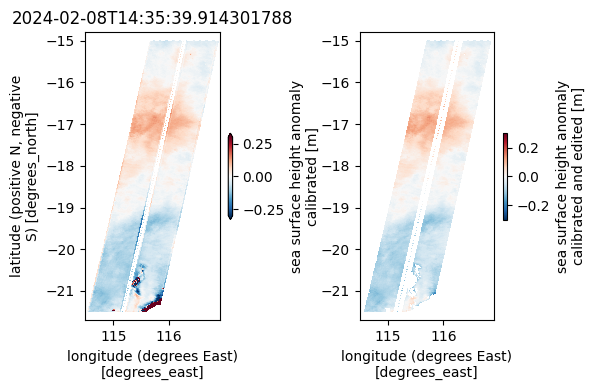

In [16]:
plot_karin_old(ds_area,9, var1='ssha_unedited',var2='ssha_unfiltered')

../FIGURES/SWOT/SWOT_Karin_l3_409_pilbara_2023-08-04.png
../FIGURES/SWOT/SWOT_Karin_l3_409_pilbara_2023-08-25.png
../FIGURES/SWOT/SWOT_Karin_l3_409_pilbara_2023-09-15.png
../FIGURES/SWOT/SWOT_Karin_l3_409_pilbara_2023-10-06.png
../FIGURES/SWOT/SWOT_Karin_l3_409_pilbara_2023-10-27.png
../FIGURES/SWOT/SWOT_Karin_l3_409_pilbara_2023-11-17.png
../FIGURES/SWOT/SWOT_Karin_l3_409_pilbara_2023-12-08.png
../FIGURES/SWOT/SWOT_Karin_l3_409_pilbara_2023-12-28.png
../FIGURES/SWOT/SWOT_Karin_l3_409_pilbara_2024-01-18.png
../FIGURES/SWOT/SWOT_Karin_l3_409_pilbara_2024-02-08.png
../FIGURES/SWOT/SWOT_Karin_l3_409_pilbara_2024-02-29.png
../FIGURES/SWOT/SWOT_Karin_l3_409_pilbara_2024-03-21.png
../FIGURES/SWOT/SWOT_Karin_l3_409_pilbara_2024-04-11.png
../FIGURES/SWOT/SWOT_Karin_l3_409_pilbara_2024-05-02.png
../FIGURES/SWOT/SWOT_Karin_l3_409_pilbara_2024-05-22.png
../FIGURES/SWOT/SWOT_Karin_l3_409_pilbara_2024-06-12.png
../FIGURES/SWOT/SWOT_Karin_l3_409_pilbara_2024-07-03.png
../FIGURES/SWOT/SWOT_Karin_l3_4

/data/jupyter-ubuntu/ProjectsActive/SWOT_NAust/NOTEBOOKS/karin.py:135: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6, 4))


../FIGURES/SWOT/SWOT_Karin_l3_409_pilbara_2024-09-25.png
../FIGURES/SWOT/SWOT_Karin_l3_409_pilbara_2024-10-15.png
../FIGURES/SWOT/SWOT_Karin_l3_409_pilbara_2024-11-05.png
../FIGURES/SWOT/SWOT_Karin_l3_409_pilbara_2024-11-26.png
../FIGURES/SWOT/SWOT_Karin_l3_409_pilbara_2024-12-17.png
../FIGURES/SWOT/SWOT_Karin_l3_409_pilbara_2025-01-07.png
../FIGURES/SWOT/SWOT_Karin_l3_409_pilbara_2025-01-28.png
../FIGURES/SWOT/SWOT_Karin_l3_409_pilbara_2025-02-18.png


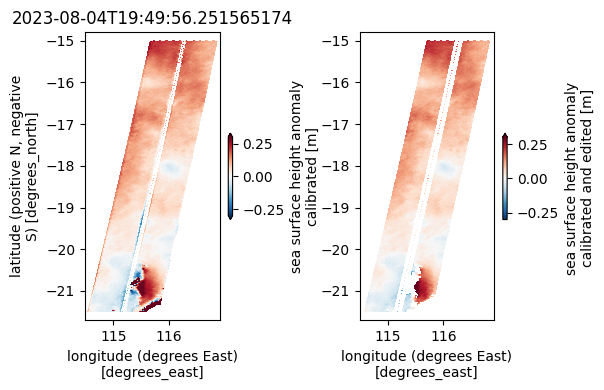

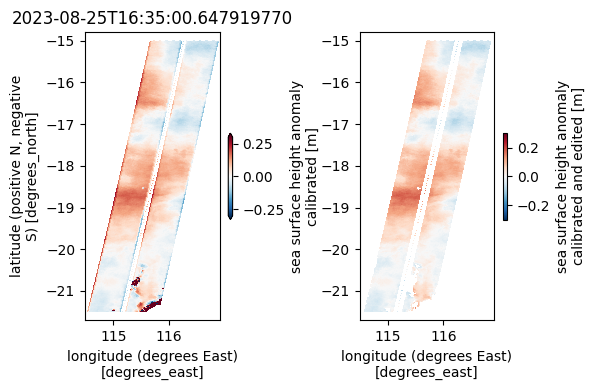

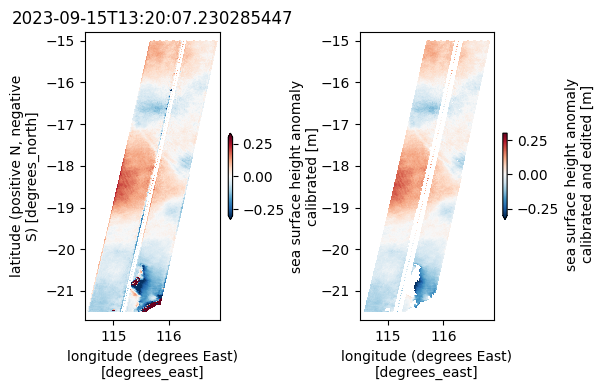

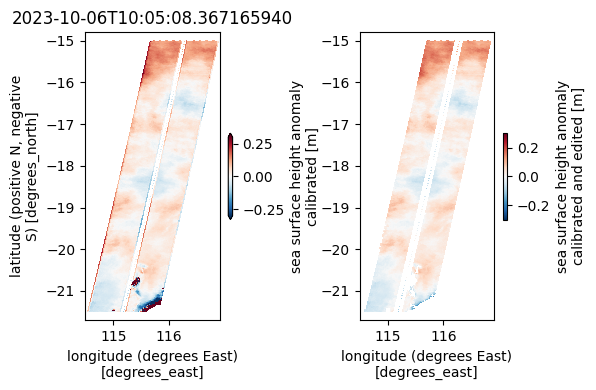

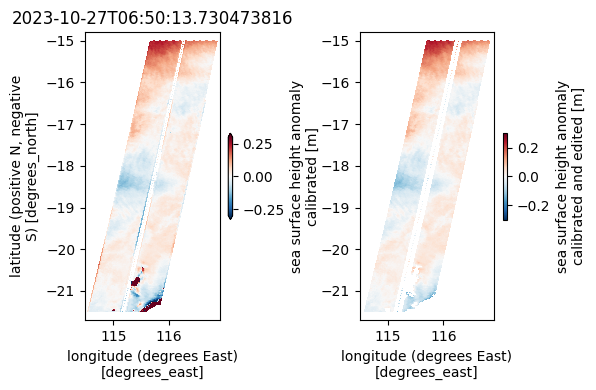

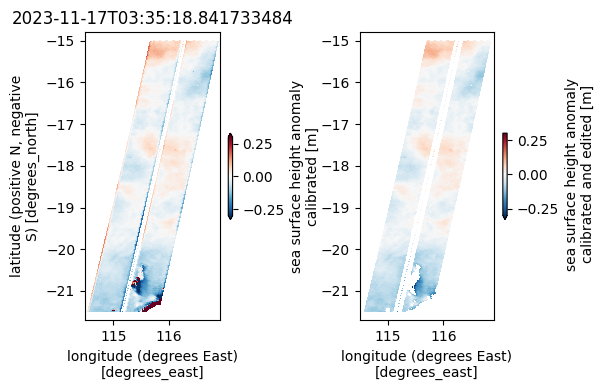

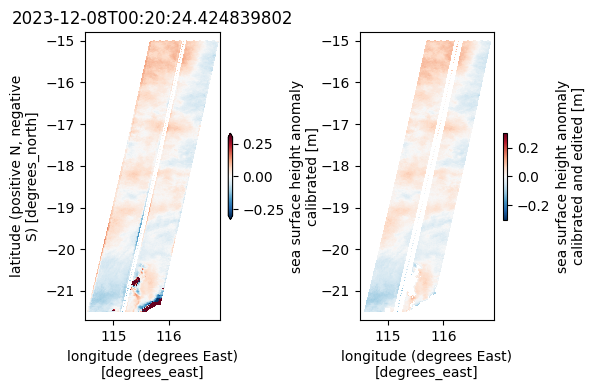

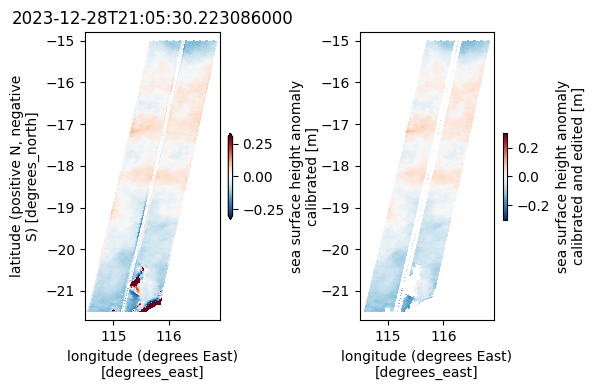

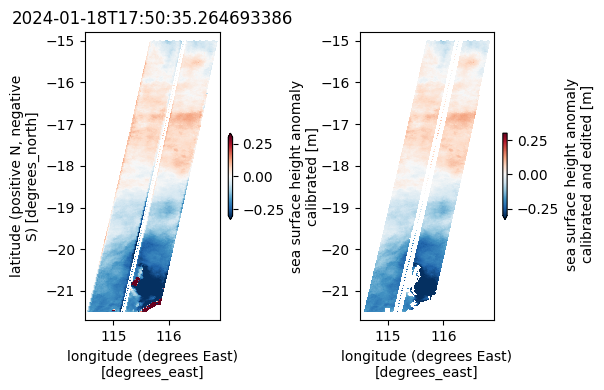

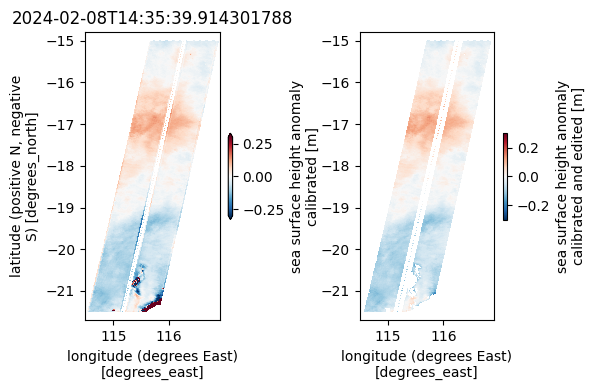

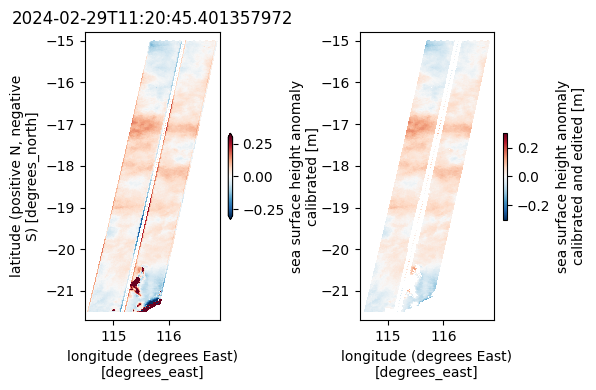

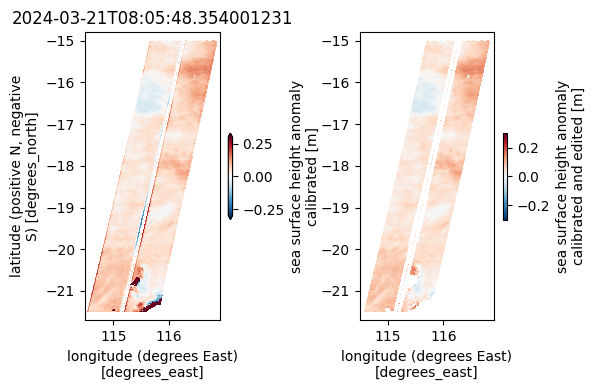

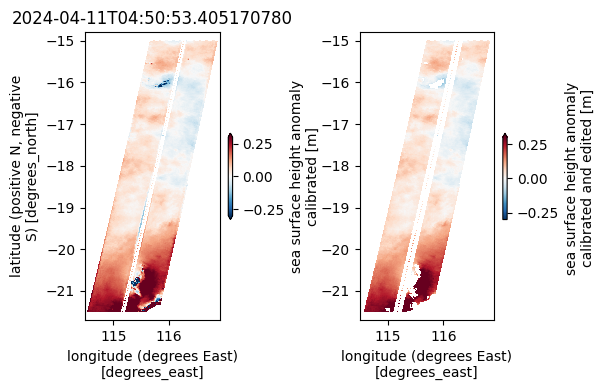

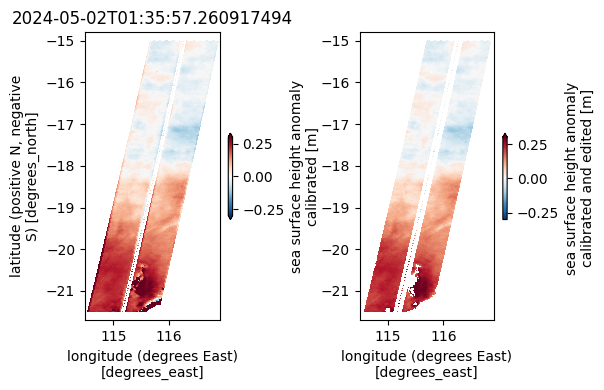

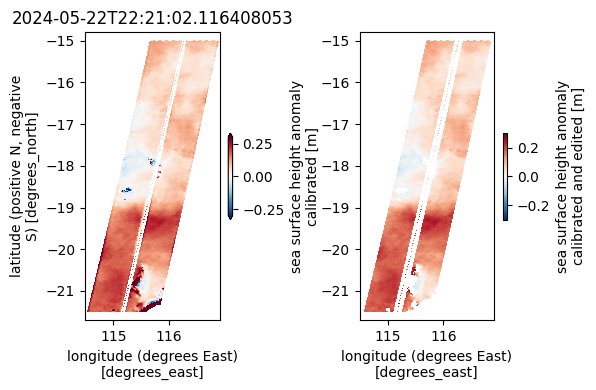

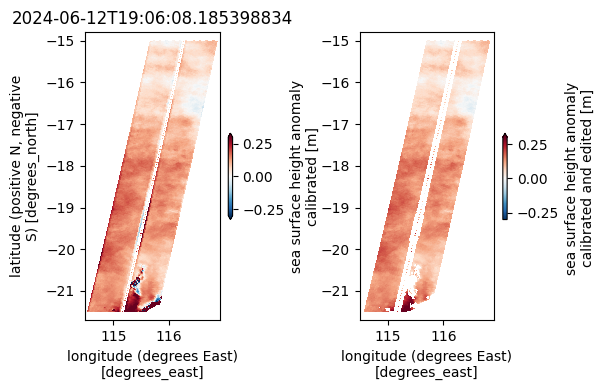

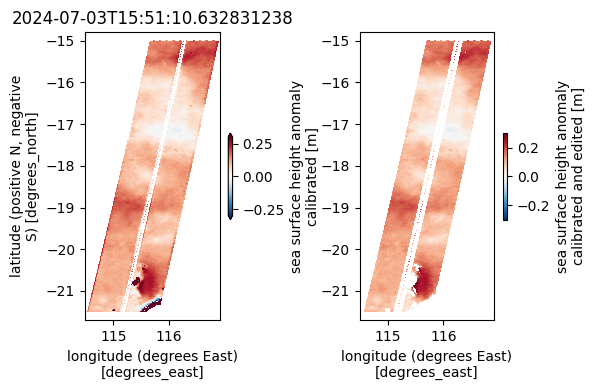

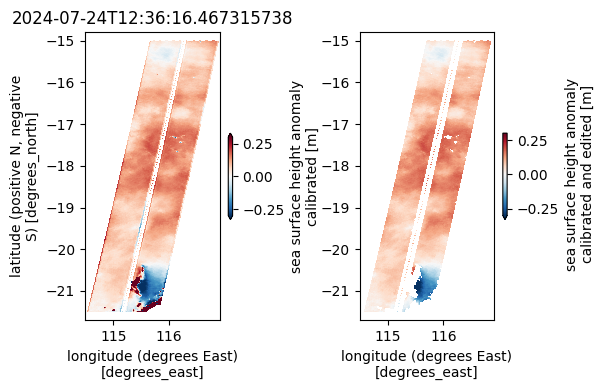

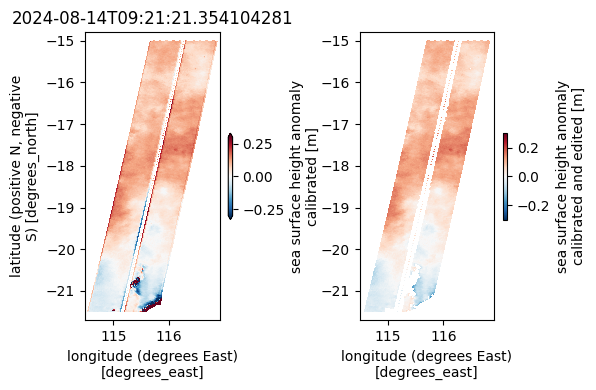

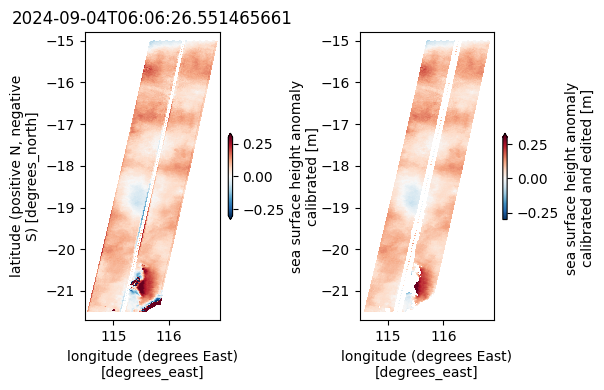

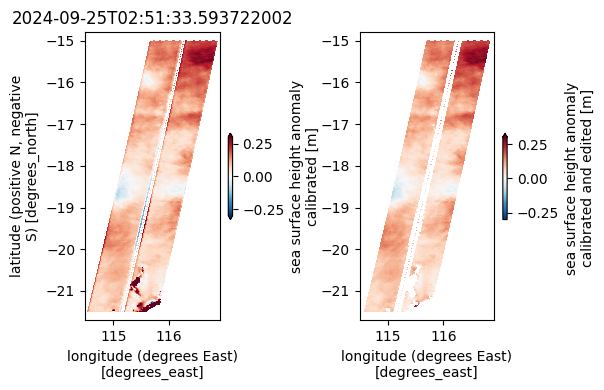

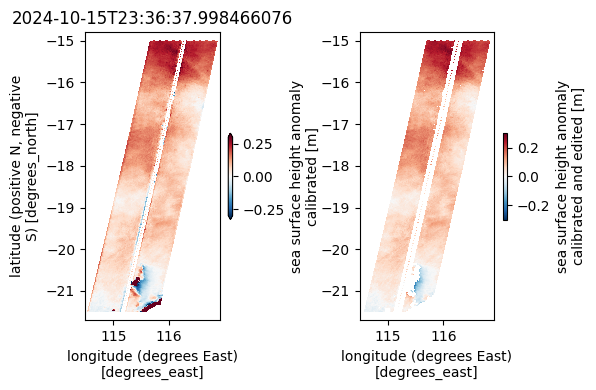

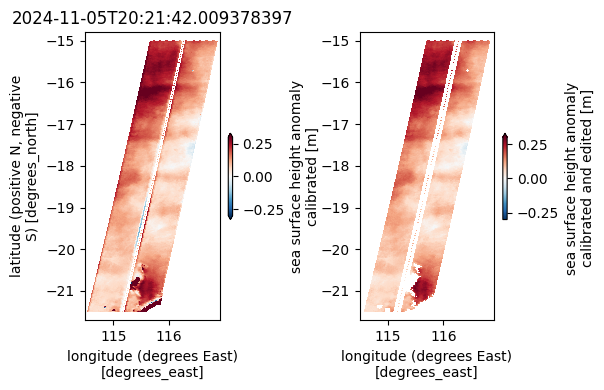

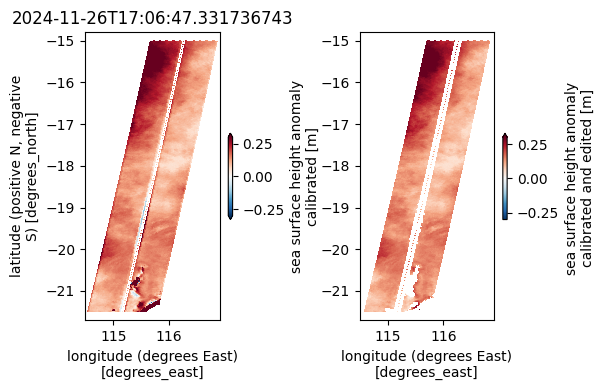

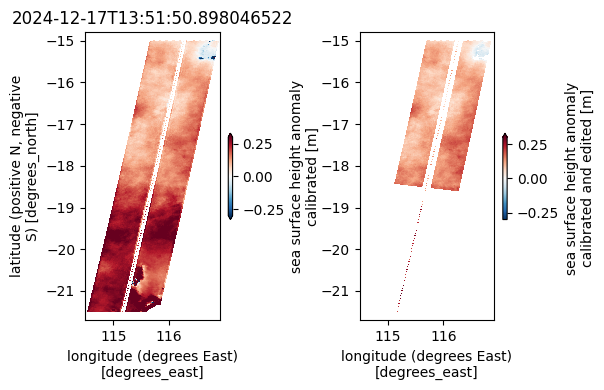

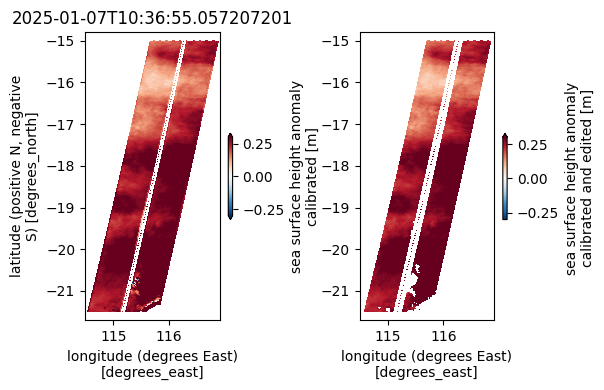

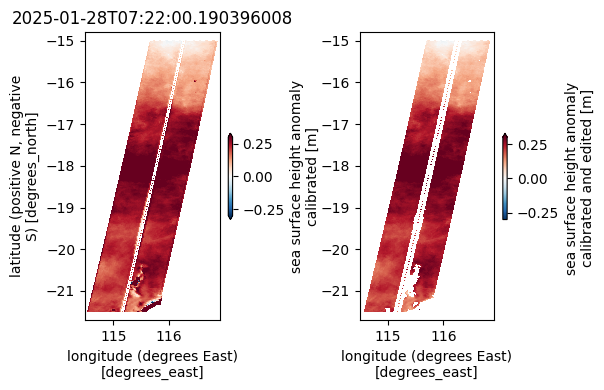

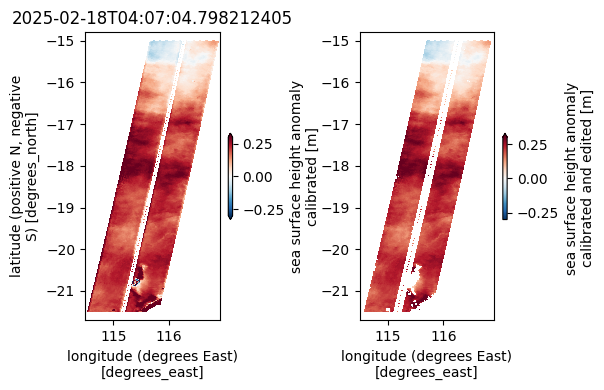

In [17]:
for ii in range(len(ncfiles)):
    outfile = '../FIGURES/SWOT/SWOT_Karin_l3_{}_{}_{}.png'.\
        format(satpass, region, ds_area.satpass.values[ii].astype(str)[0:10])
    fig,_,_ =plot_karin_old(ds_area,ii, var1='ssha_unedited',var2='ssha_unfiltered', outfile=outfile)
    
    print(outfile)
    del fig

In [18]:
ds_area

<xarray.Dataset>
Dimensions:               (satpass: 28, num_lines: 376, num_pixels: 69)
Coordinates:
  * satpass               (satpass) datetime64[ns] 2023-08-04T19:49:56.251565...
    latitude              (num_lines, num_pixels) float64 -21.49 ... -15.0
    longitude             (num_lines, num_pixels) float64 114.5 114.5 ... 116.9
Dimensions without coordinates: num_lines, num_pixels
Data variables: (12/19)
    time                  (satpass, num_lines, num_pixels) datetime64[ns] dask.array<chunksize=(1, 376, 69), meta=np.ndarray>
    calibration           (satpass, num_lines, num_pixels) float64 dask.array<chunksize=(1, 376, 69), meta=np.ndarray>
    cross_track_distance  (satpass, num_pixels, num_lines) float64 dask.array<chunksize=(1, 69, 376), meta=np.ndarray>
    dac                   (satpass, num_lines, num_pixels) float32 dask.array<chunksize=(1, 376, 69), meta=np.ndarray>
    internal_tide         (satpass, num_lines, num_pixels) float64 dask.array<chunksize=(1, 376, 69), meta=np.ndarray>
    mdt                   (satpass, num_lines, num_pixels) float64 dask.array<chunksize=(1, 376, 69), meta=np.ndarray>
    ...                    ...
    ugos                  (satpass, num_lines, num_pixels) float64 dask.array<chunksize=(1, 376, 69), meta=np.ndarray>
    ugosa_filtered        (satpass, num_lines, num_pixels) float64 dask.array<chunksize=(1, 376, 69), meta=np.ndarray>
    ugosa_unfiltered      (satpass, num_lines, num_pixels) float64 dask.array<chunksize=(1, 376, 69), meta=np.ndarray>
    vgos                  (satpass, num_lines, num_pixels) float64 dask.array<chunksize=(1, 376, 69), meta=np.ndarray>
    vgosa_filtered        (satpass, num_lines, num_pixels) float64 dask.array<chunksize=(1, 376, 69), meta=np.ndarray>
    vgosa_unfiltered      (satpass, num_lines, num_pixels) float64 dask.array<chunksize=(1, 376, 69), meta=np.ndarray>
Attributes: (12/42)
    Conventions:                     CF-1.7
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    cdm_data_type:                   Swath
    comment:                         Sea Surface Height measured by Altimetry
    data_used:                       SWOT KaRIn L2_LR_SSH PGC0/PIC0/PIC2 (NAS...
    doi:                             https://doi.org/10.24400/527896/A01-2023...
    ...                              ...
    geospatial_lon_min:              34.982333
    geospatial_lon_max:              201.913324
    date_modified:                   2025-01-07T15:21:50Z
    history:                         2025-01-07T15:21:50Z: Created by DUACS K...
    date_created:                    2025-01-07T15:21:50Z
    date_issued:                     2025-01-07T15:21:50Z

In [19]:
dt = ds_area.satpass[-1].values -ds_area.satpass[-2].values 
dt_days = dt.astype(float)*1e-9/86400
dt_days

20.864636664541635

In [20]:
fac=1
sig_m2 = fac/(12.42/24)
sig_s2 = fac/(12./24)

np.abs(sig_m2-sig_s2)

0.06763285024154575

In [21]:
1/np.abs(sig_m2-sig_s2)

14.785714285714317

In [22]:
1/(12.0/24-0.5*23.83/24)

282.3529411764663

In [23]:
f=12.42/24
fnyq = 0.5*(23.83/24)
f, fnyq

(0.5175, 0.4964583333333333)

In [88]:
f-fnyq

0.02104166666666668